# Analysis on the Car Accident Severity in US

This notebook was used to analyze the car accident severity in US. The accident data from February 2016 to June 2020 were collected in US and the severity was assessed. The analysis includes the following parts:

* [1. Introduction](#Part_1)
* [2. Data](#Part_2)
* [3. Methodology](#Part_3)
    - [3.1 Exploratory Data Analysis](#Part_3_1)
    - [3.2 Severity Analysis](#Part_3_2)
* [4. Results](#Part_4)
    - [4.1 Expolre Data](#Part_4_1)
        * [Source Distribution](#Part_4_1_1)
        * [Severity Distribution](#Part_4_1_2)
        * [Location Analysis](#Part_4_1_3)
        * [Time Analysis](#Part_4_1_4)
        * [Weather Analysis](#Part_4_1_5)
        * [POI Analysis](#Part_4_1_6)
        * [Data Preparation for modeling](#Part_4_1_7)
    - [4.2 Severity Prediction](#Part_4_2)
        * [Logistic Regression](#Part_4_2_1)
        * [Support Vector Machine](#Part_4_2_2)
        * [Random Forest](#Part_4_2_3)
        * [XGBoost](#Part_4_2_4)
        * [Model Comparison](#Part_4_2_4)
* [4. Conclusion and Summary](#Part_5)

written by Harry Li

## 1. Introduction <a id='Part_1'></a>

Traffic accidents have become a big threat to public safety and resulted in great amounts of ecomoic loss around the world. A global status report on traffic safety indicated that the number of road traffic death continued to increase steadily, reaching to 1.35 million in 2016 [[WHO, 2018]](#cite-world2018global). Therefore, one of the important task for safety analysts and political makers, in order to mitigate the severity of the accidental consequence, is to make a comprehensive assessment of historical traffic accidents and then to increase the predictability of accidents.

Accident analysis and prediction has been discussed in many previous studies and covers a broad range of categories, including, for example, ***Environmental Stimuli Analysis***, ***Accident Frequency Prediction***, and ***Accident Risk Prediction*** [[Moosavi, et. al., 2019a]](#cite-moosavi2019accident). ***Environmental Stimuli Analysis*** assesses the environmental conditions (e.g. weather, and road conditions) that are correlated with the possibility or severity of traffic accidents. ***Accident Frequency Prediction*** is targeted on predicting the number of traffic accidents for a specific road-segment or geographical region. ***Accident Risk Prediction*** is similar to the previous one. However, instead of predicting the number of accidents, it is focusing on predict the possibility of road traffic accidents for real-tiem applications.

The analysis in this work belongs to the first category as I tried to seek the potential environmental stimuli of road traffic accidents. I used several explory data analysis (EDA) tools to investigate heterogeneity in the environmental factors and assessed the impact of environmental stimuli on severity of the accidents in US using several different machine learning models. The results from my analysis may provide advice to political makers on whether new regulations are needed in specific roads or weather conditions to reduce the risk of traffic accidents. In addition, it may also give suggestions to car drivers to avoid certain raod segments or to be vigilant on certain environmental conditions.

## 2. Data <a id='Part_2'></a>

The data set employed in this study is a countrywide traffic accident dataset (US-Accidents), which covers 49 states of the United States [[Moosavi, et. al., 2019b]](#cite-moosavi2019countrywide). The data were collected continuously from February 2016 to March 2019 and contains about 3.5 million accident records in total. This data set contains various attributs including time, location, severity and description of accidents, weather conditions, points of interest annotation (e.g. whether there is a Stop sign in a nearby location). A summary table of all data attributes is shown in [Table 1](#Table_1). Details of the attributes and data acquisition strategy can be found in [Moosavi, et. al., 2019b](#cite-moosavi2019countrywide). And the data set is available on Kaggle.com (https://www.kaggle.com/sobhanmoosavi/us-accidents).

### <center>Table 1: A Listing of attibutes in US-Accidents data set (https://smoosavi.org/datasets/us_accidents) <a id='Table_1'></a></center>

|#|	Attribute|	Description|	Nullable|
| :-: | :-: | :- | :-: |
|1|	ID|	This is a unique identifier of the accident record.|	No|
|2|	Source|	Indicates source of the accident report (i.e. the API which reported the accident.).|	No|
|3|	TMC|	A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.|	Yes|
|4|	Severity|	Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).|	No|
|5|	Start_Time|	Shows start time of the accident in local time zone.|	No|
|6|	End_Time|	Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.|	No|
|7|	Start_Lat|	Shows latitude in GPS coordinate of the start point.|	No|
|8|	Start_Lng|	Shows longitude in GPS coordinate of the start point.|	No|
|9|	End_Lat|	Shows latitude in GPS coordinate of the end point.|	Yes|
|10|	End_Lng|	Shows longitude in GPS coordinate of the end point.|	Yes|
|11|	Distance(mi)|	The length of the road extent affected by the accident.|	No|
|12|	Description|	Shows natural language description of the accident.|	No|
|13|	Number|	Shows the street number in address field.|	Yes|
|14|	Street|	Shows the street name in address field.|	Yes|
|15|	Side|	Shows the relative side of the street (Right/Left) in address field.|	Yes|
|16|	City|	Shows the city in address field.|	Yes|
|17|	County|	Shows the county in address field.|	Yes|
|18|	State|	Shows the state in address field.|	Yes|
|19|	Zipcode|	Shows the zipcode in address field.|	Yes|
|20|	Country|	Shows the country in address field.|	Yes|
|21|	Timezone|	Shows timezone based on the location of the accident (eastern, central, etc.).|	Yes|
|22|	Airport_Code|	Denotes an airport-based weather station which is the closest one to location of the accident.|	Yes|
|23|	Weather_Timestamp|	Shows the time-stamp of weather observation record (in local time).|	Yes|
|24|	Temperature(F)|	Shows the temperature (in Fahrenheit).|	Yes|
|25|	Wind_Chill(F)|	Shows the wind chill (in Fahrenheit).|	Yes|
|26|	Humidity(%)|	Shows the humidity (in percentage).|	Yes|
|27|	Pressure(in)|	Shows the air pressure (in inches).|	Yes|
|28|	Visibility(mi)|	Shows visibility (in miles).|	Yes|
|29|	Wind_Direction|	Shows wind direction.|	Yes|
|30|	Wind_Speed(mph)|	Shows wind speed (in miles per hour).|	Yes|
|31|	Precipitation(in)|	Shows precipitation amount in inches, if there is any.|	Yes|
|32|	Weather_Condition|	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)|	Yes|
|33|	Amenity|	A POI annotation which indicates presence of amenity in a nearby location.|	No|
|34|	Bump|	A POI annotation which indicates presence of speed bump or hump in a nearby location.|	No|
|35|	Crossing|	A POI annotation which indicates presence of crossing in a nearby location.|	No|
|36|	Give_Way|	A POI annotation which indicates presence of give_way in a nearby location.|	No|
|37|	Junction|	A POI annotation which indicates presence of junction in a nearby location.|	No|
|38|	No_Exit|	A POI annotation which indicates presence of no_exit in a nearby location.|	No|
|39|	Railway|	A POI annotation which indicates presence of railway in a nearby location.|	No|
|40|	Roundabout|	A POI annotation which indicates presence of roundabout in a nearby location.|	No|
|41|	Station|	A POI annotation which indicates presence of station in a nearby location.|	No|
|42|	Stop|	A POI annotation which indicates presence of stop in a nearby location.|	No|
|43|	Traffic_Calming|	A POI annotation which indicates presence of traffic_calming in a nearby location.|	No|
|44|	Traffic_Signal|	A POI annotation which indicates presence of traffic_signal in a nearby location.|	No|
|45|	Turning_Loop|	A POI annotation which indicates presence of turning_loop in a nearby location.|	No|
|46|	Sunrise_Sunset|	Shows the period of day (i.e. day or night) based on sunrise/sunset.|	Yes|
|47|	Civil_Twilight|	Shows the period of day (i.e. day or night) based on civil twilight.|	Yes|
|48|	Nautical_Twilight|	Shows the period of day (i.e. day or night) based on nautical twilight.|	Yes|
|49|	Astronomical_Twilight|	Shows the period of day (i.e. day or night) based on astronomical twilight.|	Yes|

## 3. Methodology <a id='Part_3'></a>

### 3.1 Exploratory Data Analysis <a id='Part_3_1'></a>

Exploratory data analysis (EDA) was implemented on the US-Accidents data set in order to reveal the heterogeneity in the data attributes. The distribution in the time, location, weather conditions were analyzed to get a comprehensive understanding on the characteristics of the data set. The cross-corelation was also calculated for better investigating the relationship between the environmental stimuli and severity of accidents, as well as for reducing the dimension of features for regression since only one of the highly correlated attributes is needed as the input feature of regression models.

### 3.2 Severity Analysis <a id='Part_3_2'></a>

Due to the limitation of computational power, the severity analysis was only focused on data from one state in US. Multiple regression models, including multi-variate logistic Regression, Support Vector Machine, Random Forest and XGBoost, were employed to predict severity of the accidents. The performance of each model was evaluated and compared based on accuracy score of the prediction. The importance of features in predict accident severity were also discussed.

## 4. Results <a id='Part_4'></a>

### 4.1 Expolre Data <a id='Part_4_1'></a>

In this part, I went through the overview of the data set. The distributions of features and the relationship between attributes were discussed. I selected and processed the data for further severity prediction.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import time

In [2]:
# read data
data = pd.read_csv('./data/US_Accidents_June20.csv')

In [135]:
# Overview of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

Let's take a look at the first few rows of the data.

In [136]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


#### Source Distribution<a id='Part_4_1_1'></a>

/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


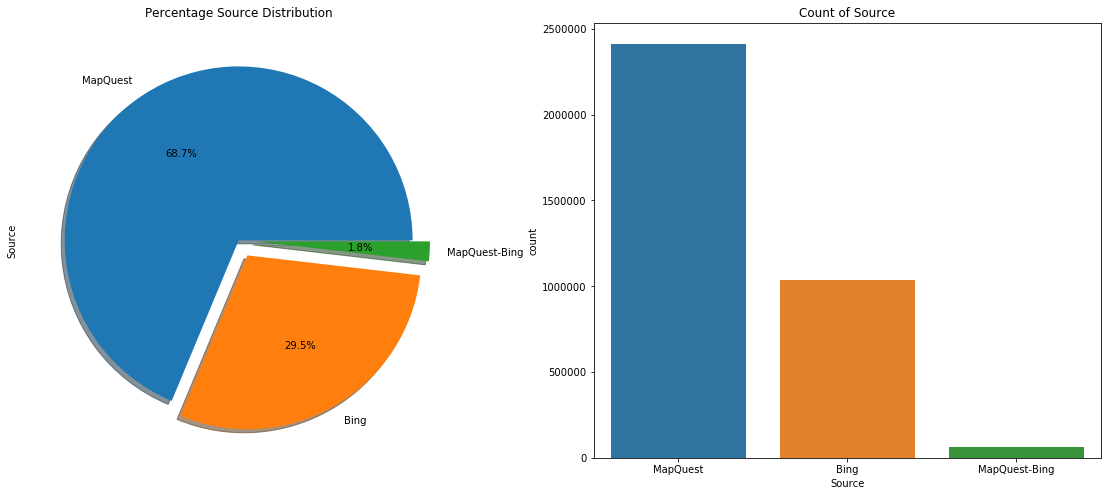

In [137]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
data['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Source Distribution')
sns.countplot('Source',data=data,ax=ax[1],order=data['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.savefig('./output/source_distribution.png',bbox_inches='tight', dpi=200)

#### Severity Distribution <a id='Part_4_1_2'></a>

Severity shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


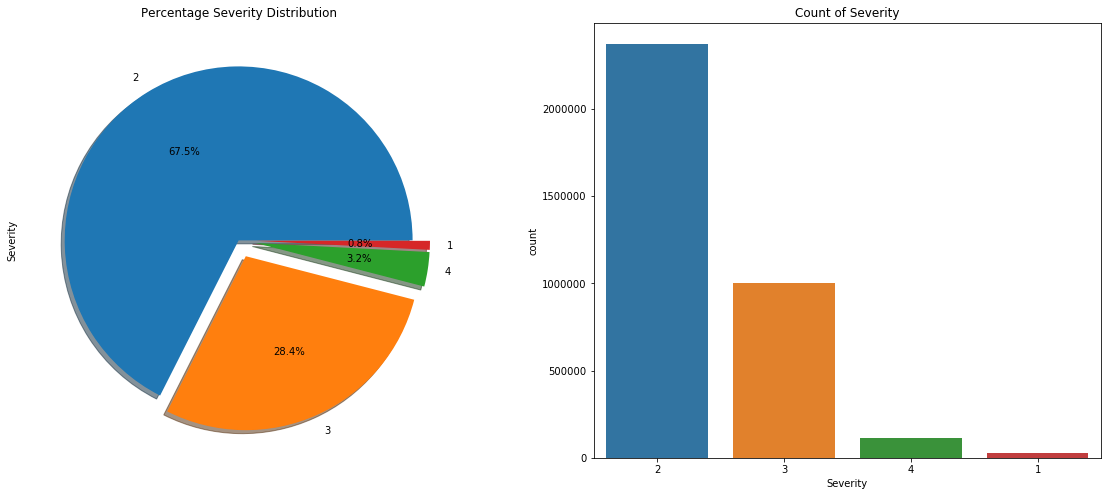

In [138]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
data['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
sns.countplot('Severity',data=data,ax=ax[1],order=data['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.savefig('./output/severity_distribution.png',bbox_inches='tight', dpi=200)

The distribution of severity is uneven. Over 95% accidents are labeled as medium severity. Only 0.8% events are labeled as level 1 severity. This may need to be addressed when implementing regressions to predict low-severity events. 

#### Location Analysis<a id='Part_4_1_3'></a>
Draw the traffic accidents on the map.

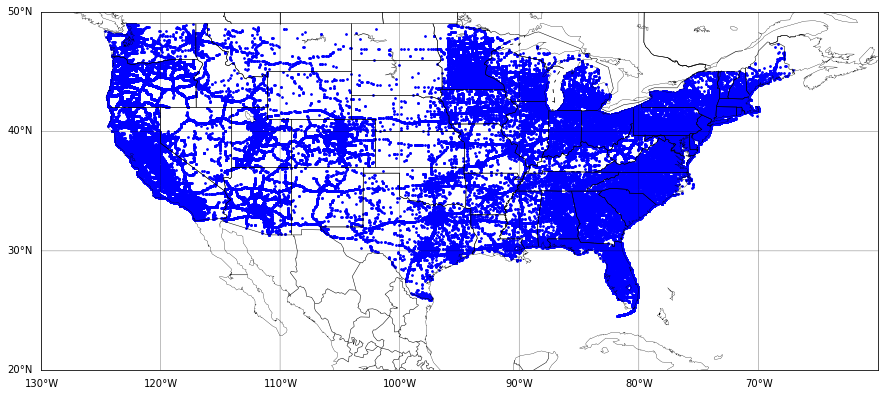

In [177]:
fig = plt.figure(figsize=(15,12))

# create basemap
map = Basemap(projection='cyl', llcrnrlat=20, urcrnrlat=50,llcrnrlon=230, urcrnrlon=300, resolution='l')
map.drawcoastlines(linewidth=0.3)
map.drawcountries()
map.drawstates()

# draw lat/lon lines
parallels = np.arange(20, 55, 10)
meridians = np.arange(230, 300, 10)
map.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0.5)
map.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0.5)

plt.scatter(360+data.Start_Lng.values, data.Start_Lat.values, s=3, c='b')
plt.savefig('./output/accident_map.png',bbox_inches='tight', dpi=200)

Most accidents happen in the west coast US and eastern US, there may be also accidents on the national highway in the mid-US. Fewer accidents in the mid-US are recorded in the data set.

Check the state distribution

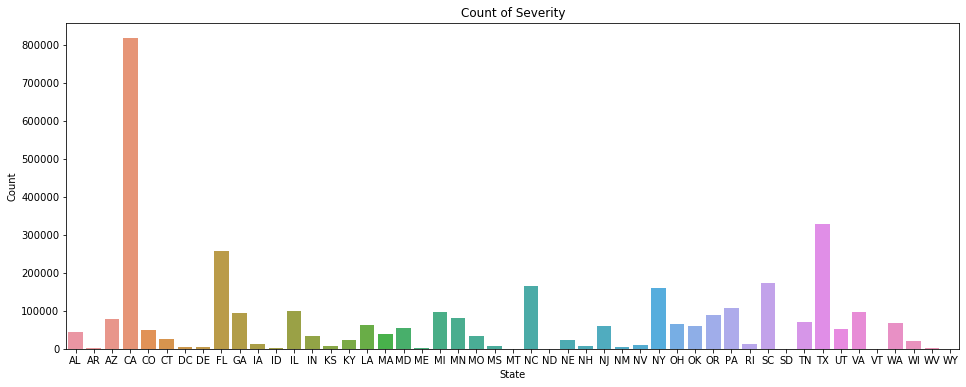

In [140]:
# count the number of accidents for each state
df = data.groupby('State')['ID'].count()
fig=plt.figure(figsize=(16,6))
sns.barplot(x=df.index,y=df)
plt.title('Count of Severity')
plt.ylabel('Count')
plt.savefig('./output/state_distribution.png',bbox_inches='tight', dpi=200)

Most accidents are recorded in state of California(CA). Texas(TX) and Florida(FL) also have significantly more accidents than other states.

#### Time Analysis<a id='Part_4_1_4'></a>
Extract year, month, day, hour, weekday, and duration time of the accidents

In [74]:
# Convert Start_Time and End_Time to datetypes
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
data['Year']=data['Start_Time'].dt.year
data['Month']=data['Start_Time'].dt.month
data['Day']=data['Start_Time'].dt.day
data['Hour']=data['Start_Time'].dt.hour
data['Weekday']=data['Start_Time'].dt.weekday          # Monday is 0, Sunday is 6
data['Weekday_string']=data['Start_Time'].dt.strftime('%a')          # Monday is 0, Sunday is 6

# Extract the duration time in the unit of minutes for each accident, round to the nearest integer
data['Duration_time(min)']=round((data['End_Time']-data['Start_Time'])/np.timedelta64(1,'m'))
data[['Year', 'Month', 'Weekday','Weekday_string','Duration_time(min)']].head()

,Year,Month,Weekday,Weekday_string,Duration_time(min)
0,2016,2,0,Mon,314.0
1,2016,2,0,Mon,30.0
2,2016,2,0,Mon,30.0
3,2016,2,0,Mon,30.0
4,2016,2,0,Mon,30.0


In [75]:
# Add a new column to present if the accidents happend in weekdays or at weekends
data['Is_weekend']=data['Weekday']
data.loc[data['Weekday']<5,'Is_weekend'] = 'Weekdays'
data.loc[data['Weekday']>=5,'Is_weekend'] = 'Weekends'
data['Is_weekend'].head()

0    Weekdays
1    Weekdays
2    Weekdays
3    Weekdays
4    Weekdays
Name: Is_weekend, dtype: object

Check the durantion time and drop negative duration time.

In [76]:
# drop negative duration time
data.drop(data.loc[data['Duration_time(min)']<=0].index,axis=0, inplace=True)

# check success
data['ID'][data['Duration_time(min)']<=0].count()

0

Weekday distribution

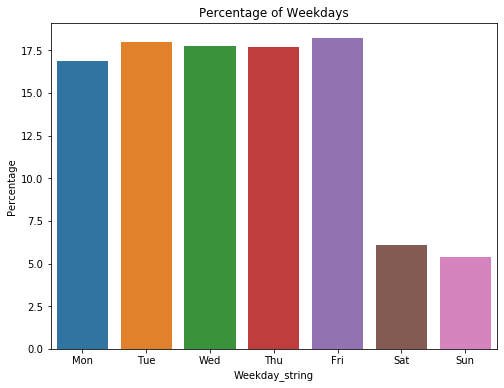

In [77]:
# count the number of accidents for different weekdays
df = data.groupby('Weekday_string')['ID'].count()
df = df/df.sum()*100
df = df.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig=plt.figure(figsize=(8,6))
sns.barplot(x=df.index,y=df)
plt.title('Percentage of Weekdays')
plt.ylabel('Percentage')
plt.savefig('./output/weekday_distribution.png',bbox_inches='tight', dpi=200)

The number of accidents in weekdays are over two times more than that at weekends. The distribution of accidents in weekdays are even.

Hour of Day

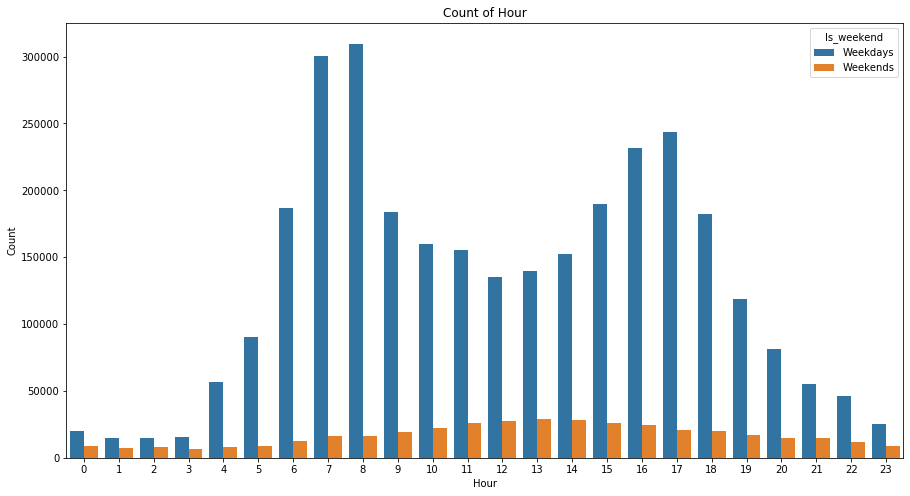

In [78]:
# plot the distribution of hour of day
fig=plt.figure(figsize=(15,8))
sns.countplot(x="Hour", hue="Is_weekend", data=data)
plt.title('Count of Hour')
plt.ylabel('Count')
plt.savefig('./output/hour_of_day_distribution.png',bbox_inches='tight', dpi=200)

Clearly, the more accidents are happening at 7:00-8:00 and 16:00-17:00 in the weekdays, while more accidents are happening in the afternoon at weekends.

Duration Time

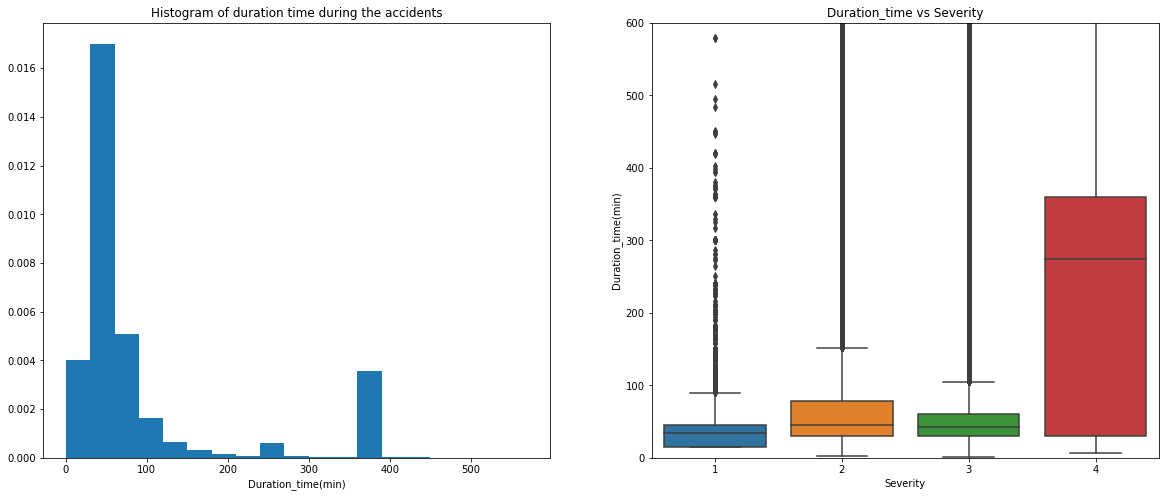

In [146]:
# Duration_time distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Duration_time(min)'], bins=np.arange(0,600,30), density=True)
ax[0].set_title('Histogram of duration time during the accidents')
ax[0].set_xlabel('Duration_time(min)')
ax[1]=sns.boxplot(x='Severity', y='Duration_time(min)', data=data)
ax[1].set_title('Duration_time vs Severity')
ax[1].set_ylim(0,600)
plt.savefig('./output/duration_time_distribution.png',bbox_inches='tight', dpi=200)

The median duration time for level 4 severity accidents is much longer than low-level severity events. The duration time may be important to detect level 4 severity.

#### Weather Analysis<a id='Part_4_1_5'></a>

Take a look at the weather condition when accidents happened at first.

In [147]:
df = data.groupby('Weather_Condition')['ID'].count()
df

Weather_Condition
Blowing Dust                 73
Blowing Dust / Windy        117
Blowing Sand                  1
Blowing Snow                337
Blowing Snow / Windy         62
                           ... 
Volcanic Ash                 22
Widespread Dust             148
Widespread Dust / Windy       1
Wintry Mix                 1681
Wintry Mix / Windy           40
Name: ID, Length: 127, dtype: int64

There are 127 different weather conditions. Check the top 10 weather conditions

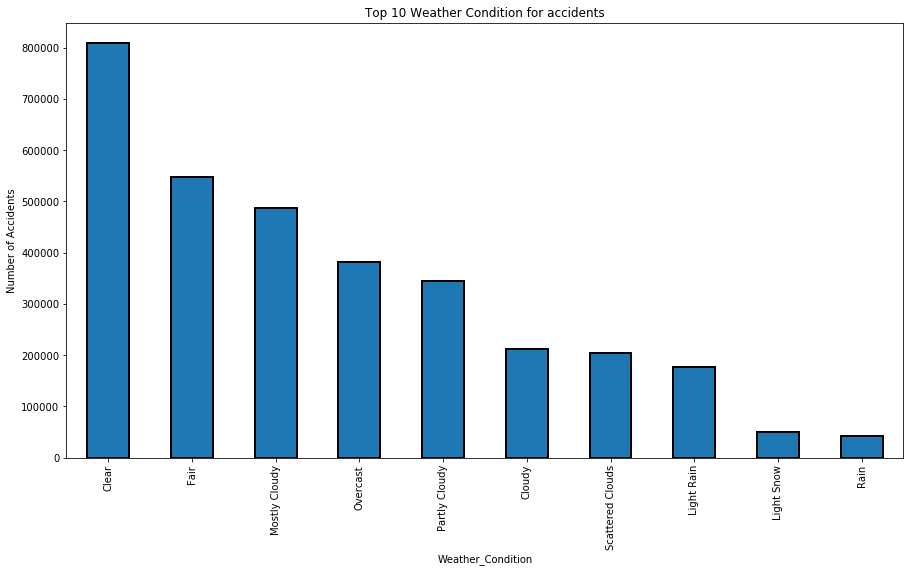

In [148]:
# plot for top 10 weather conditions
fig=plt.figure(figsize=(15,8))
data['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Weather Condition for accidents')
plt.savefig('./output/top_10_weather_conditions.png',bbox_inches='tight', dpi=200)

Surprisingly, more accidents are happening in clear sky or fair condition.

Take a further look at other weather features.

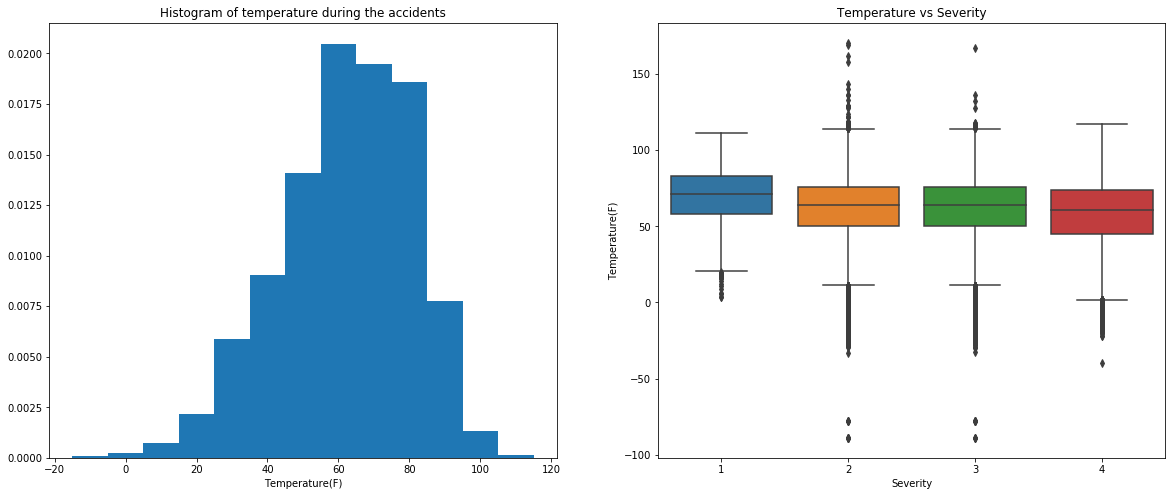

In [149]:
# Temperature distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Temperature(F)'], bins=np.arange(-15, 120,10), density=True)
ax[0].set_title('Histogram of temperature during the accidents')
ax[0].set_xlabel('Temperature(F)')
ax[1]=sns.boxplot(x='Severity', y='Temperature(F)', data=data)
ax[1].set_title('Temperature vs Severity')
plt.savefig('./output/temperature_distribution.png',bbox_inches='tight', dpi=200)

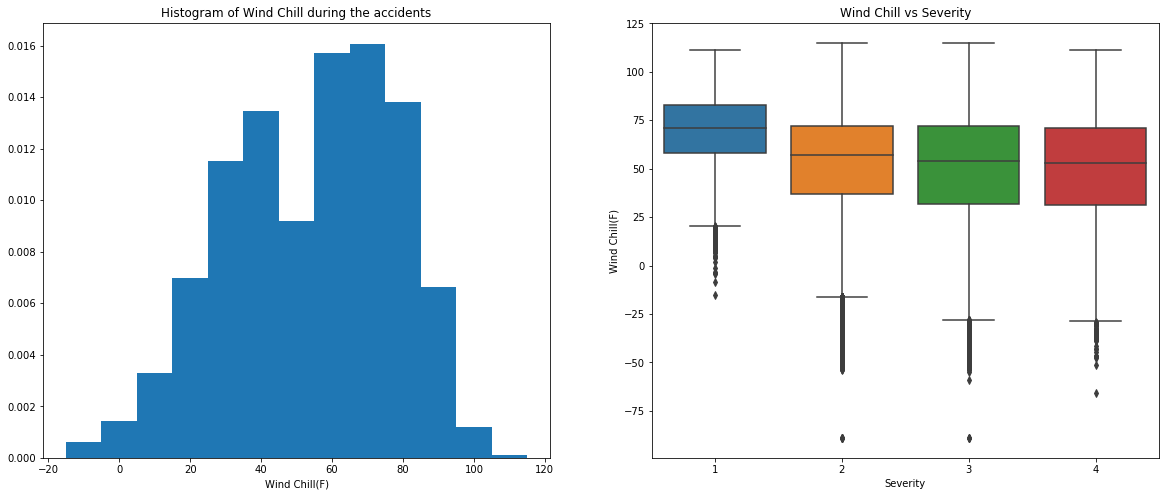

In [150]:
# Wind Chill distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Wind_Chill(F)'], bins=np.arange(-15, 120,10), density=True)
ax[0].set_title('Histogram of Wind Chill during the accidents')
ax[0].set_xlabel('Wind Chill(F)')
ax[1]=sns.boxplot(x='Severity', y='Wind_Chill(F)', data=data)
ax[1].set_title('Wind Chill vs Severity')
ax[1].set_ylabel('Wind Chill(F)')
plt.savefig('./output/wind_chill_distribution.png',bbox_inches='tight', dpi=200)

There are double peaks in the histogram of wind chill. The wind chill may be a good classifier to distinguish level 1 severity from other levels.

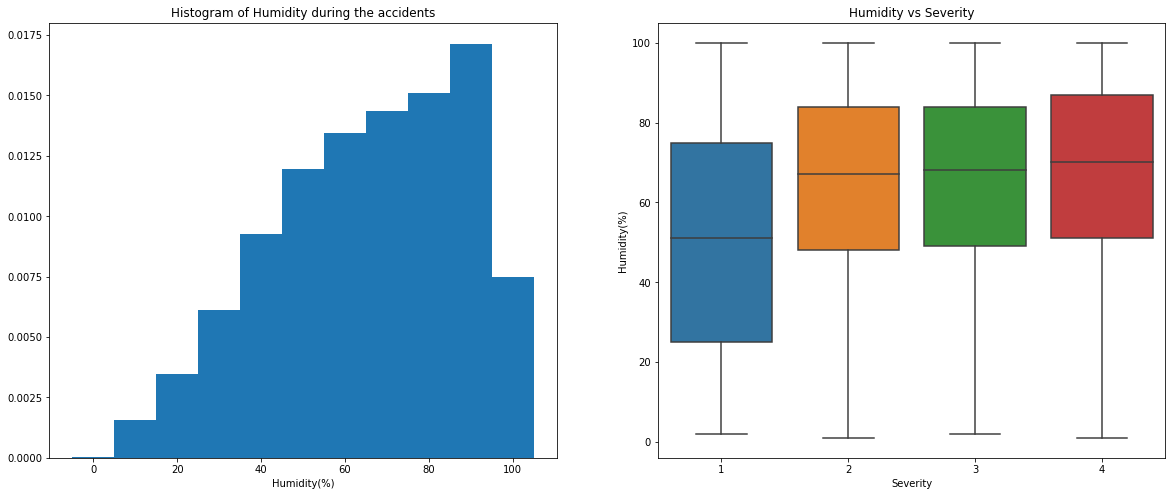

In [151]:
# Humidity distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Humidity(%)'], bins=np.arange(-5, 110,10), density=True)
ax[0].set_title('Histogram of Humidity during the accidents')
ax[0].set_xlabel('Humidity(%)')
ax[1]=sns.boxplot(x='Severity', y='Humidity(%)', data=data)
ax[1].set_title('Humidity vs Severity')
ax[1].set_ylabel('Humidity(%)')
plt.savefig('./output/humidity_distribution.png',bbox_inches='tight', dpi=200)

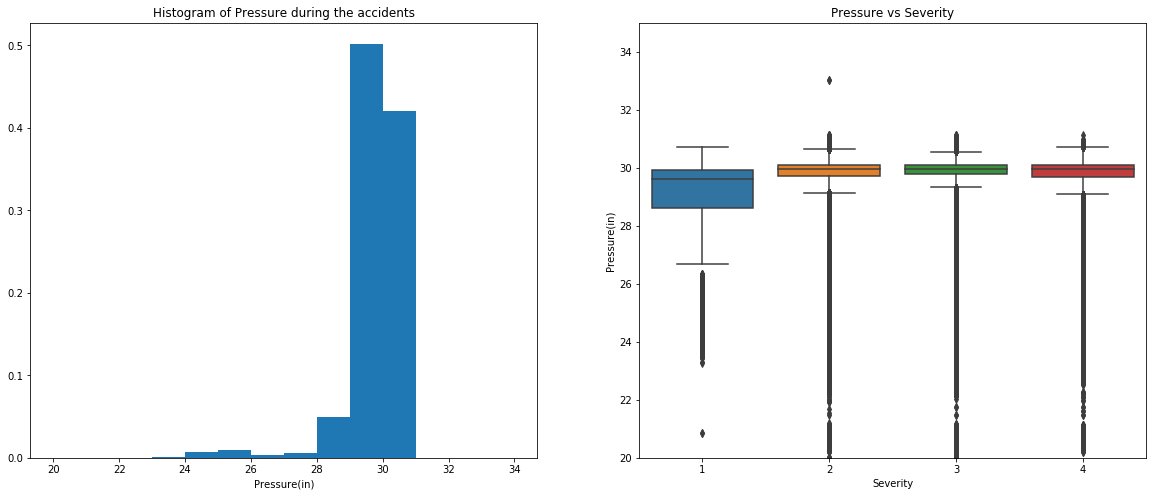

In [152]:
# Pressure distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Pressure(in)'], bins=np.arange(20, 35,1), density=True)
ax[0].set_title('Histogram of Pressure during the accidents')
ax[0].set_xlabel('Pressure(in)')
ax[1]=sns.boxplot(x='Severity', y='Pressure(in)', data=data)
ax[1].set_title('Pressure vs Severity')
ax[1].set_ylabel('Pressure(in)')
ax[1].set_ylim(20,35)
plt.savefig('./output/pressure_distribution.png',bbox_inches='tight', dpi=200)

The pressure may be also a good classifier to distinguish level 1 severity from other levels.

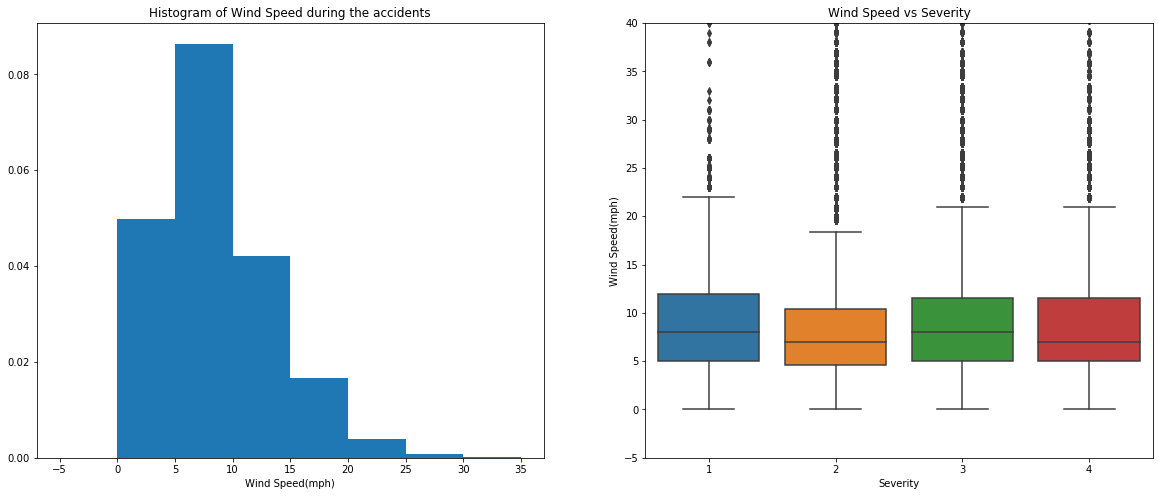

In [153]:
# wind speed distribution
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(data['Wind_Speed(mph)'], bins=np.arange(-5, 40,5), density=True)
ax[0].set_title('Histogram of Wind Speed during the accidents')
ax[0].set_xlabel('Wind Speed(mph)')
ax[1]=sns.boxplot(x='Severity', y='Wind_Speed(mph)', data=data)
ax[1].set_title('Wind Speed vs Severity')
ax[1].set_ylabel('Wind Speed(mph)')
ax[1].set_ylim(-5,40)
plt.savefig('./output/wind_speed_distribution.png',bbox_inches='tight', dpi=200)

#### POI Analysis<a id='Part_4_1_6'></a>

Check the relationship between Point of Interest and Severity.

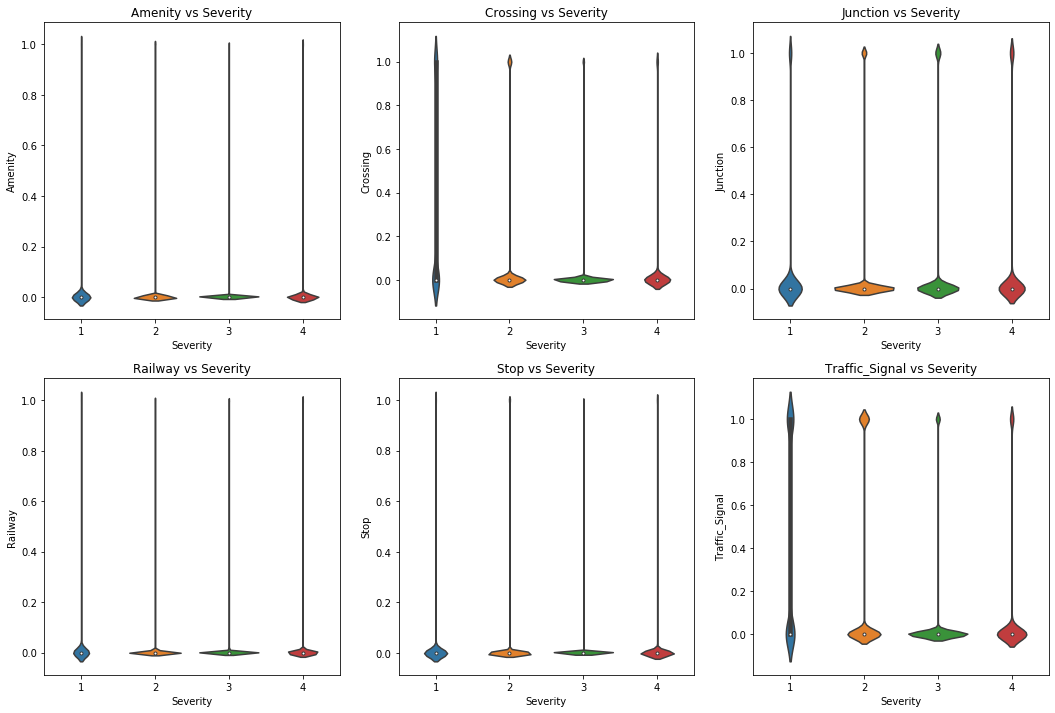

In [154]:
poi_list = ['Amenity', 'Crossing', 'Junction','Railway', 'Stop', 'Traffic_Signal']

# wind speed distribution
fig=plt.figure(figsize=(18,12))
for i in range(len(poi_list)):
    ax = fig.add_subplot(2,3,i+1)
    sns.violinplot(x='Severity', y=poi_list[i], data=data)
    ax.set_title(poi_list[i]+' vs Severity')
    ax.set_ylabel(poi_list[i])

plt.savefig('./output/POI_distribution.png',bbox_inches='tight', dpi=200)

#### Data Preparation for modeling<a id='Part_4_1_7'></a>

Check for missing values

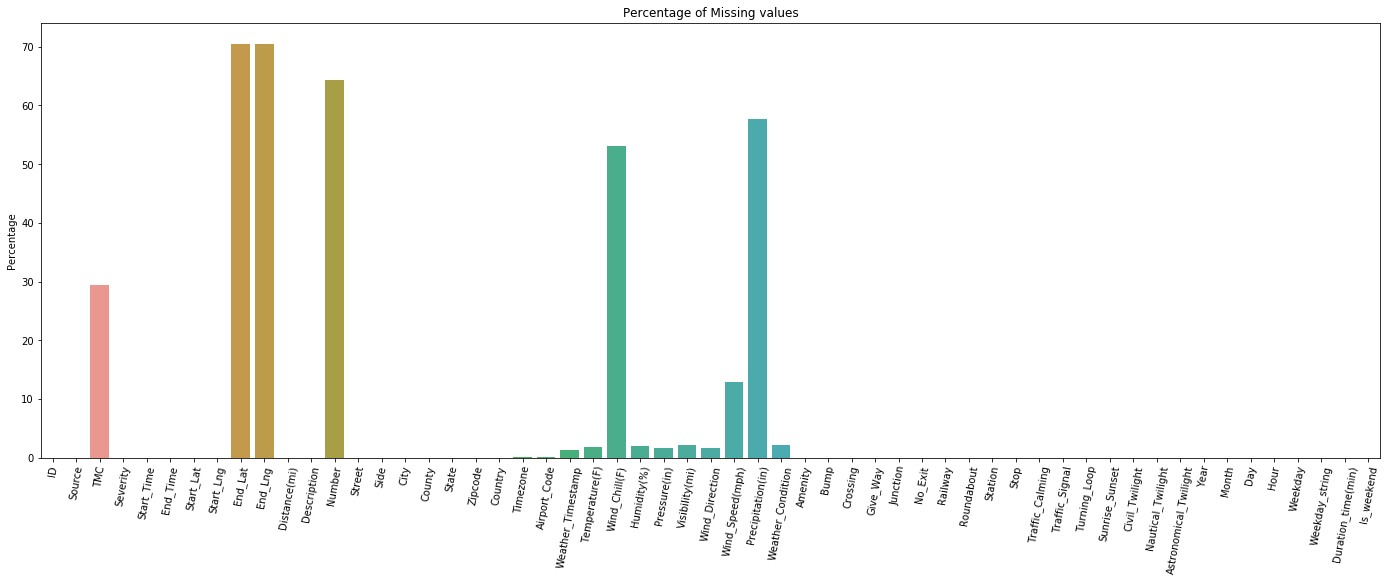

In [155]:
# count for the ratio of missing value
df = data.isnull().mean(axis=0)
df=df*100

# plot for the ratios
fig=plt.figure(figsize=(24,8))
sns.barplot(x=df.index, y=df)
plt.title('Percentage of Missing values')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.savefig('./output/missing_value_percentage.png',bbox_inches='tight', dpi=200)

TMC, End_Lat, End_Lng, Number, Wind_Chill, and Precipitation need to be dropped as the high ratio of missing values.

In [156]:
# Select the list pf feature to include in Machine Learning
feature_lst=['Source','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County',
             'State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)', 
             'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction',
             'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
             'Turning_Loop','Sunrise_Sunset','Year','Month','Day','Hour','Weekday', 'Weekday_string',
             'Is_weekend','Duration_time(min)']

In [157]:
# Select the dataset to include only the selected features
train_data=data[feature_lst].copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   Severity            int64  
 2   Start_Lng           float64
 3   Start_Lat           float64
 4   Distance(mi)        float64
 5   Side                object 
 6   City                object 
 7   County              object 
 8   State               object 
 9   Timezone            object 
 10  Temperature(F)      float64
 11  Humidity(%)         float64
 12  Pressure(in)        float64
 13  Visibility(mi)      float64
 14  Wind_Direction      object 
 15  Weather_Condition   object 
 16  Amenity             bool   
 17  Bump                bool   
 18  Crossing            bool   
 19  Give_Way            bool   
 20  Junction            bool   
 21  No_Exit             bool   
 22  Railway             bool   
 23  Roundabout          bool   
 24  Station             bool

Drop rows with missing values

In [158]:
train_data.dropna(subset=train_data.columns[train_data.isnull().mean()!=0], how='any', axis=0, inplace=True)
train_data.shape

(3402734, 38)

Check the correlation with Severity.

In [159]:
# calculate the correlation between severity and other features (float or boolean)
x_cols = [col for col in train_data.columns if col not in ['Severity'] if (train_data[col].dtype=='float64')or(train_data[col].dtype=='bool')or(train_data[col].dtype=='int64')]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_data[col].values, train_data.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

df = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
df

/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,col_labels,corr_values
18,Traffic_Signal,-0.192179
9,Crossing,-0.139232
20,Year,-0.089225
16,Stop,-0.053467
11,Junction,0.060627
24,Weekday,0.074388
0,Start_Lng,0.080783
2,Distance(mi),0.149782


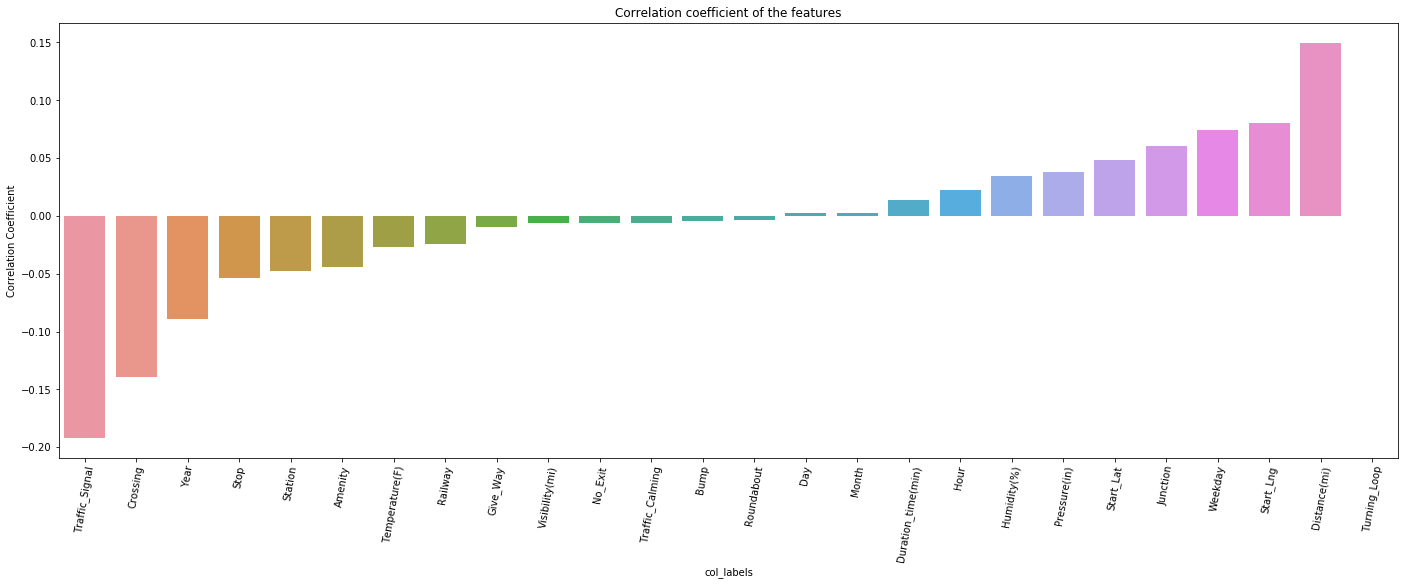

In [160]:
# plot for the ratios
fig=plt.figure(figsize=(24,8))
sns.barplot(x=corr_df.col_labels, y=corr_df.corr_values)
plt.title('Correlation coefficient of the features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=80)
plt.savefig('./output/correlation_severity_vs_others.png',bbox_inches='tight', dpi=200)

We may expect the Distance, Start_Lng, Stop, Junction, Year, Weekday, Traffic_Signal and Crossing to be important features for severity prediction.

Check the highly correlated features.

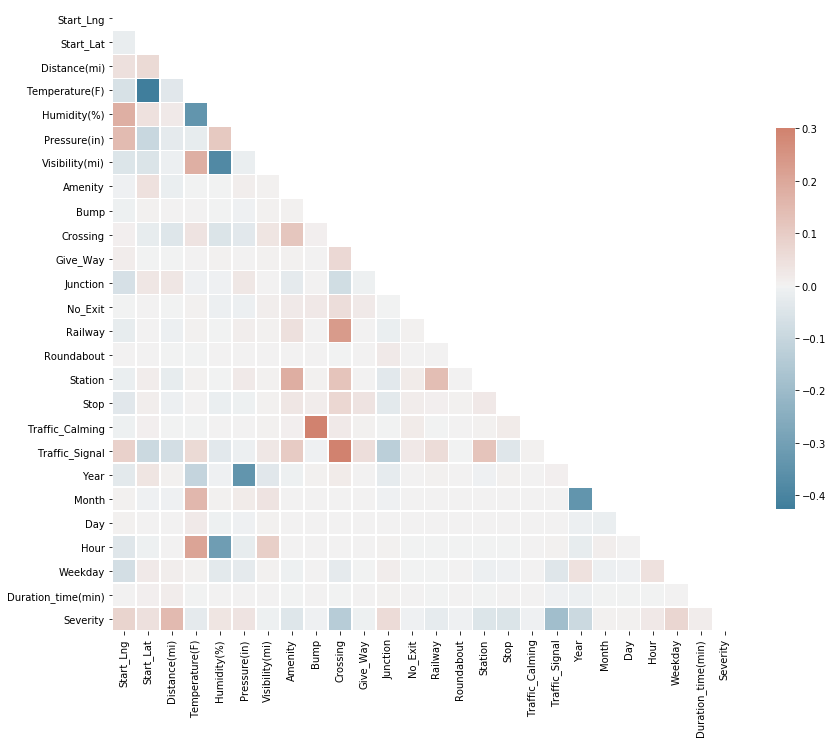

In [161]:
# add 'Severity' to cols
cols = x_cols.copy()
cols.append('Severity')
cols.remove('Turning_Loop')    # remove 'Turning_Loop' since it has no variance

# compute the correlation matrix
corr = train_data[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot the correlation matrix
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('./output/features_correlation_map.png',bbox_inches='tight', dpi=200)

Ok, the maximum absolute correlation coefficient is around 0.4, so there is no need to drop any feature.

In [162]:
# Drop 'Turning_Loop' and save the new data set for further training
train_data.drop(columns=['Turning_Loop'], inplace=True)

# Export the data with selected features
train_data.to_csv('./data/US_Accidents_June20_clean_dropna.csv',index=False)

### 4.2 Severity Prediction <a id='Part_4_2'></a>

In [2]:
# Import data if it was already exported based on previous work
train_data=pd.read_csv('./data/US_Accidents_June20_clean_dropna.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402734 entries, 0 to 3402733
Data columns (total 37 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   Severity            int64  
 2   Start_Lng           float64
 3   Start_Lat           float64
 4   Distance(mi)        float64
 5   Side                object 
 6   City                object 
 7   County              object 
 8   State               object 
 9   Timezone            object 
 10  Temperature(F)      float64
 11  Humidity(%)         float64
 12  Pressure(in)        float64
 13  Visibility(mi)      float64
 14  Wind_Direction      object 
 15  Weather_Condition   object 
 16  Amenity             bool   
 17  Bump                bool   
 18  Crossing            bool   
 19  Give_Way            bool   
 20  Junction            bool   
 21  No_Exit             bool   
 22  Railway             bool   
 23  Roundabout          bool   
 24  Station             bool

Due to the limitation of personal laptop, the whole US dataset is too big to handle. Take a look at counts of accidents and average severity levels.

In [3]:
df=train_data.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)
df

State
SD    3.300000
WY    3.123457
ND    2.761905
AR    2.739153
MT    2.684105
GA    2.653455
IA    2.640098
MO    2.634006
WI    2.629132
WV    2.622747
Name: Severity, dtype: float64

In [4]:
df=train_data.groupby('State')['Severity'].count().sort_values(ascending=False).head(10)
df

State
CA    788379
TX    320209
FL    252040
SC    168681
NC    164285
NY    156785
PA    104321
IL     98883
MI     95437
GA     91535
Name: Severity, dtype: int64

The following analysis was based on Georgia (GA), where numerous accidents happened and on average more severe accident happened (Both number of accidents and average severity level are in top 10).

/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Severity')

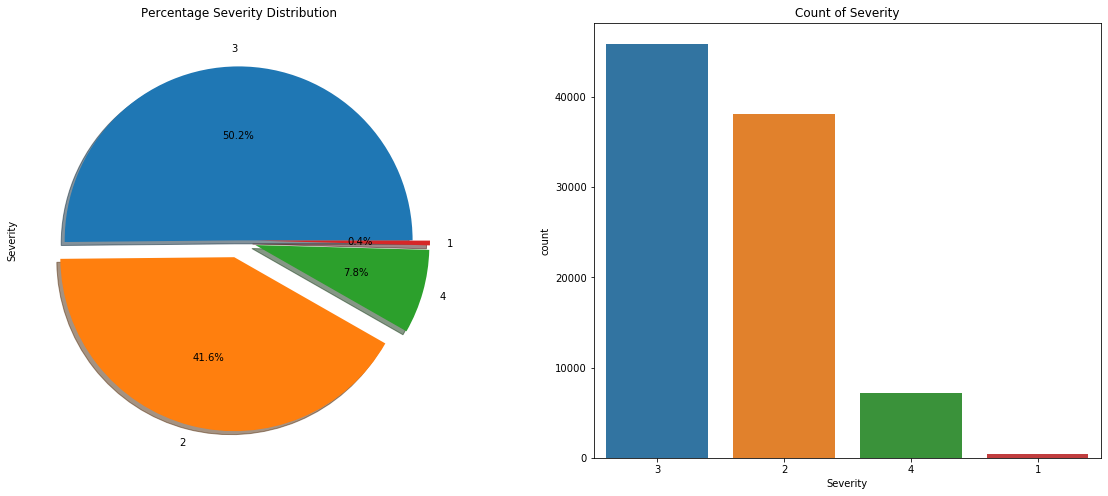

In [5]:
# Set state
state='GA'

# Select the state of Pennsylvania
train_data=train_data.loc[train_data.State==state].copy()

fig,ax=plt.subplots(1,2,figsize=(20,8))
train_data['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
sns.countplot('Severity',data=train_data,ax=ax[1],order=train_data['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')

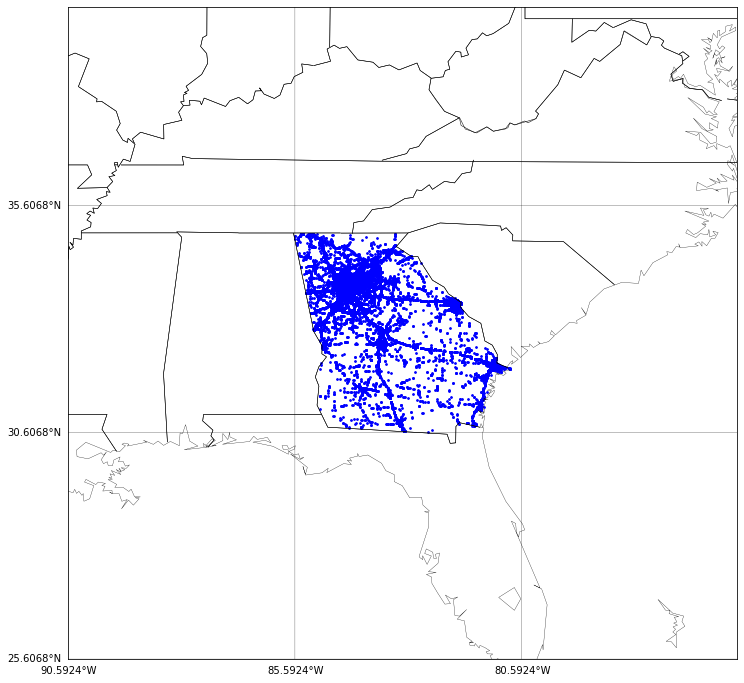

In [6]:
fig = plt.figure(figsize=(15,12))

lonl = np.amin(360+train_data.Start_Lng.values)-5
lonr = np.amax(360+train_data.Start_Lng.values)+5
latl = np.amin(train_data.Start_Lat.values)-5
latu = np.amax(train_data.Start_Lat.values)+5

# create basemap
map = Basemap(projection='cyl', llcrnrlat=latl, urcrnrlat=latu,llcrnrlon=lonl, urcrnrlon=lonr, resolution='l')
map.drawcoastlines(linewidth=0.3)
map.drawcountries()
map.drawstates()

# draw lat/lon lines
parallels = np.arange(latl, latu, 5)
meridians = np.arange(lonl, lonr, 5)
map.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0.5)
map.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0.5)

plt.scatter(360+train_data.Start_Lng.values, train_data.Start_Lat.values, s=3, c='b')

In [7]:
# drop the State, County, City and Timezone, since Start_Lng already indicates the location of accidents
# also drop Source, Year, Month, Day and Weekday
df=train_data.drop(columns=['Source','State', 'County', 'City', 'Timezone','Year','Month','Day','Weekday'])
# train_data.drop(columns=['Source','State', 'County', 'City', 'Timezone','Weather_Condition','Year','Month','Day','Weekday'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91535 entries, 141801 to 3402425
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Severity            91535 non-null  int64  
 1   Start_Lng           91535 non-null  float64
 2   Start_Lat           91535 non-null  float64
 3   Distance(mi)        91535 non-null  float64
 4   Side                91535 non-null  object 
 5   Temperature(F)      91535 non-null  float64
 6   Humidity(%)         91535 non-null  float64
 7   Pressure(in)        91535 non-null  float64
 8   Visibility(mi)      91535 non-null  float64
 9   Wind_Direction      91535 non-null  object 
 10  Weather_Condition   91535 non-null  object 
 11  Amenity             91535 non-null  bool   
 12  Bump                91535 non-null  bool   
 13  Crossing            91535 non-null  bool   
 14  Give_Way            91535 non-null  bool   
 15  Junction            91535 non-null  bool   
 1

Remove outliers in 'Duration_time' and Normalize the data set

In [9]:
from sklearn import preprocessing

# Remove outliers for Duration_time(min): > 99.9th percentile, backfill with median

outliers = (df['Duration_time(min)'] > np.percentile(df['Duration_time(min)'].values,99.9))
median = np.percentile(df['Duration_time(min)'].values,50)

# Set outliers to NAN
df.loc[outliers,'Duration_time(min)'] = np.nan

# Fill NAN with median
df['Duration_time(min)'].fillna(median, inplace=True)

# Print time_duration information
dt='Duration_time(min)'
print('Max time to clear an accident: {} minutes or {} hours or {} days'.format(df[dt].max(),round(df[dt].max()/60), round(df[dt].max()/60/24)))

# normalize the data set
cols = [col for col in df.columns if col not in ['Severity'] if (df[col].dtype=='float64')or(df[col].dtype=='int64')]

scaler = preprocessing.StandardScaler().fit(df[cols])
df_trans = df.copy()
df_trans[cols] = scaler.transform(df[cols])

# cols=['Start_Lng','Start_Lat','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)',
#      'Visibility(mi)','Duration_time(min)']
# train_data[cols]=(train_data[cols]-train_data[cols].mean(axis=0))/train_data[cols].std(axis=0)
# print(train_data[cols].mean(axis=0))

Max time to clear an accident: 480.0 minutes or 8 hours or 0 days


One-hot encoding for categorical features

In [10]:
# Generate dummies for categorical data
train_data_dummy = pd.get_dummies(df_trans,drop_first=True)
train_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91535 entries, 141801 to 3402425
Columns: 106 entries, Severity to Is_weekend_Weekends
dtypes: bool(12), float64(9), int64(1), uint8(84)
memory usage: 16.1 MB


In [11]:
train_data_dummy.head()

,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,Bump,...,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Wintry Mix,Sunrise_Sunset_Night,Weekday_string_Mon,Weekday_string_Sat,Weekday_string_Sun,Weekday_string_Thu,Weekday_string_Tue,Weekday_string_Wed,Is_weekend_Weekends
141801,3,-0.659509,-0.141728,-0.238812,-0.148617,1.303297,-0.114219,-2.570159,False,False,...,0,0,0,0,0,0,0,0,1,0
141802,3,-0.604613,0.272085,-0.238812,-0.148617,0.982529,-0.152772,-2.570159,False,False,...,0,0,0,0,0,0,0,0,1,0
141803,3,-0.567099,0.310648,-0.238812,-0.148617,0.982529,-0.152772,-2.784007,False,False,...,0,0,0,0,0,0,0,0,1,0
141804,2,-0.484943,0.143305,-0.238812,-0.148617,1.303297,-0.075666,-0.003981,False,False,...,0,0,0,0,0,0,0,0,1,0
141805,3,-0.470368,0.141550,-0.238812,-0.148617,1.303297,-0.210601,0.423716,False,False,...,0,0,0,0,0,0,0,0,1,0


Prepare data for training and validation.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
# Assign the data
df=train_data_dummy

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
Y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=23, stratify=Y)
X_train.shape

(82381, 105)

In [82]:
# List of classification algorithms
algo_lst=['Logistic Regression','Support Vector Machine','Random Forest', 'XGBoost']

#### Logistic Regression<a id='Part_4_2_1'></a>

In [66]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [67]:
# logistic regression
lg_clf = LogisticRegression(random_state=2, max_iter=1000, verbose=2, penalty='l2', solver='lbfgs',multi_class='multinomial')
lg_clf.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.9s finished


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2,
                   verbose=2)

In [68]:
# make the prediction
Y_pred=lg_clf.predict(X_test)

# get the accuracy score
lg_acc=accuracy_score(Y_test, Y_pred)

print("[Logistic regression algorithm] accuracy_score: {:.4f}.".format(lg_acc))

print("Classification report for classifier %s:\n%s\n"
      % (lg_clf, classification_report(Y_test, Y_pred)))

[Logistic regression algorithm] accuracy_score: 0.6906.
Classification report for classifier LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2,
                   verbose=2):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        40
           2       0.73      0.59      0.65      3807
           3       0.68      0.85      0.76      4591
           4       0.56      0.23      0.33       716

    accuracy                           0.69      9154
   macro avg       0.49      0.42      0.43      9154
weighted avg       0.69      0.69      0.68      9154




Confusion Matrix

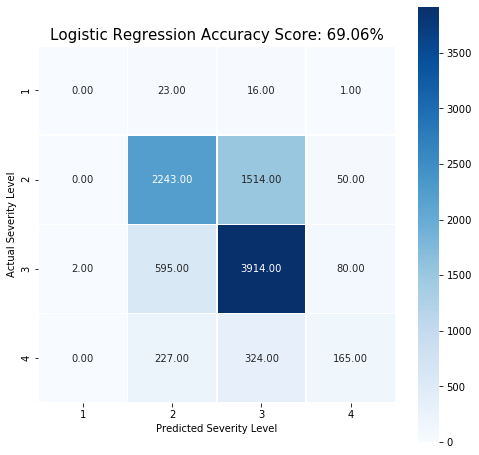

In [69]:
# calculate the confusion matrix
lg_cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,8))
labels = [1,2,3,4]
sns.heatmap(lg_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual Severity Level')
plt.xlabel('Predicted Severity Level')
all_sample_title = 'Logistic Regression Accuracy Score: {0:.2f}%'.format(lg_acc*100)
plt.title(all_sample_title, size = 15)
plt.savefig('./output/logistic_regression_cm.png',bbox_inches='tight', dpi=200)

#### Support Vector Machine (SVM) <a id='Part_4_2_2'></a>

In [19]:
# import svm
from sklearn import svm

In [20]:
# SVM regrassion
svm_clf = svm.SVC(verbose=2,kernel='linear')
svm_clf.fit(X_train,Y_train)

[LibSVM]

SVC(kernel='linear', verbose=2)

In [31]:
# make the prediction
Y_pred=svm_clf.predict(X_test)

# get the accuracy score
svm_acc=accuracy_score(Y_test, Y_pred)

print("[SVM algorithm] accuracy_score: {:.4f}.".format(svm_acc))

print("Classification report for classifier %s:\n%s\n"
      % (svm_clf, classification_report(Y_test, Y_pred)))

[SVM algorithm] accuracy_score: 0.6839.
Classification report for classifier SVC(kernel='linear', verbose=2):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        40
           2       0.70      0.60      0.65      3807
           3       0.68      0.85      0.75      4591
           4       0.78      0.05      0.10       716

    accuracy                           0.68      9154
   macro avg       0.54      0.38      0.38      9154
weighted avg       0.69      0.68      0.66      9154




/Users/harryliyi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


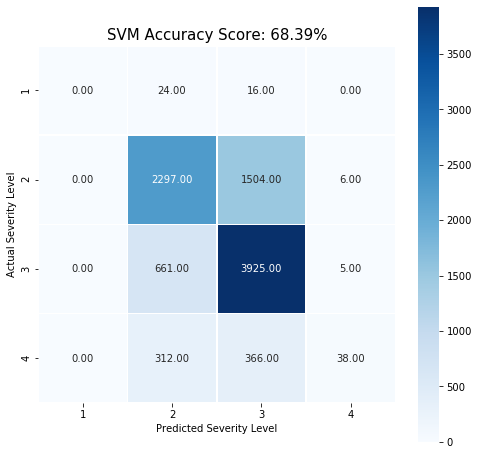

In [22]:
# calculate the confusion matrix
svm_cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,8))
labels = [1,2,3,4]
sns.heatmap(svm_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual Severity Level')
plt.xlabel('Predicted Severity Level')
all_sample_title = 'SVM Accuracy Score: {0:.2f}%'.format(svm_acc*100)
plt.title(all_sample_title, size = 15)
plt.savefig('./output/svm_regression_cm.png',bbox_inches='tight', dpi=200)

#### Random Forest <a id='Part_4_2_3'></a>

In [70]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Random Forest regrassion
rf_clf = RandomForestClassifier(n_estimators=150,random_state=2,verbose=1)
rf_clf.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.4s finished


RandomForestClassifier(n_estimators=150, random_state=2, verbose=1)

In [72]:
# make the prediction
Y_pred=rf_clf.predict(X_test)

# get the accuracy score
rf_acc=accuracy_score(Y_test, Y_pred)

print("[Random Forest algorithm] accuracy_score: {:.4f}.".format(rf_acc))

print("Classification report for classifier %s:\n%s\n"
      % (rf_clf, classification_report(Y_test, Y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Random Forest algorithm] accuracy_score: 0.7928.
Classification report for classifier RandomForestClassifier(n_estimators=150, random_state=2, verbose=1):
              precision    recall  f1-score   support

           1       0.67      0.10      0.17        40
           2       0.80      0.75      0.77      3807
           3       0.79      0.86      0.82      4591
           4       0.75      0.64      0.69       716

    accuracy                           0.79      9154
   macro avg       0.75      0.59      0.62      9154
weighted avg       0.79      0.79      0.79      9154




[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


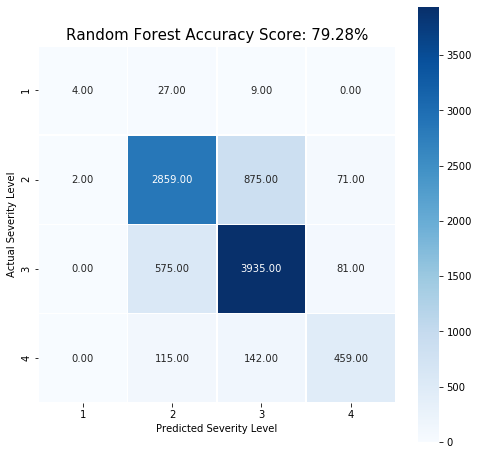

In [73]:
# calculate the confusion matrix
rf_cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,8))
labels = [1,2,3,4]
sns.heatmap(rf_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual Severity Level')
plt.xlabel('Predicted Severity Level')
all_sample_title = 'Random Forest Accuracy Score: {0:.2f}%'.format(rf_acc*100)
plt.title(all_sample_title, size = 15)
plt.savefig('./output/random_forest_regression_cm.png',bbox_inches='tight', dpi=200)

Visualize important features

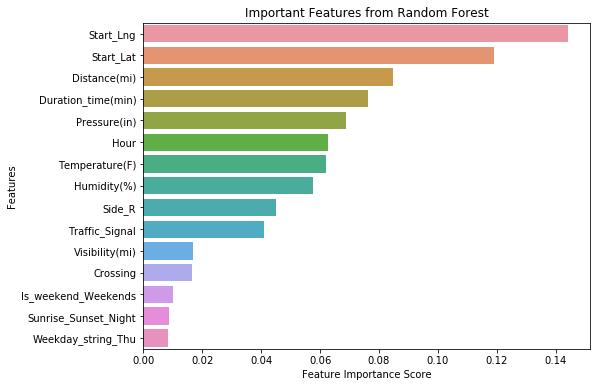

In [74]:
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=15
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp[:k], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features from Random Forest")
plt.savefig('./output/random_forest_feature_importance.png',bbox_inches='tight', dpi=200)

#### XGBoost <a id='Part_4_2_4'></a>

In [75]:
# import XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

In [76]:
xgb_clf = XGBClassifier(booster='gbtree', 
                        objective='multi:softmax',
                        max_depth=5, 
                        n_estimators=500, 
                        num_class=4,
                       )

In [77]:
# train the model
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# make the prediction
Y_pred=xgb_clf.predict(X_test)

# get the accuracy score
xgb_acc=accuracy_score(Y_test, Y_pred)

print("[XGBoost algorithm] accuracy_score: {:.4f}.".format(xgb_acc))

print("Classification report for classifier %s:\n%s\n"
      % (xgb_clf, classification_report(Y_test, Y_pred)))

[XGBoost algorithm] accuracy_score: 0.8200.
Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None):
              precision    recall  f1-score   support

           1       0.53      0.20      0.29        40
           2       0.83      0.79      0.81      3807
           3       0.83      0.87      0.85      4591
           4       0.73      0.67      0.70       716

    ac

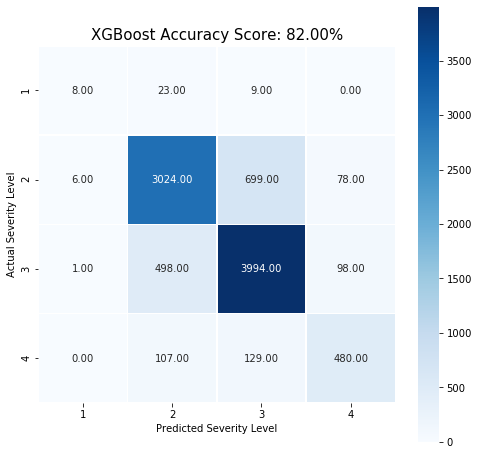

In [79]:
# calculate the confusion matrix
xgb_cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,8))
labels = [1,2,3,4]
sns.heatmap(xgb_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual Severity Level')
plt.xlabel('Predicted Severity Level')
all_sample_title = 'XGBoost Accuracy Score: {0:.2f}%'.format(xgb_acc*100)
plt.title(all_sample_title, size = 15)
plt.savefig('./output/xgboost_regression_cm.png',bbox_inches='tight', dpi=200)

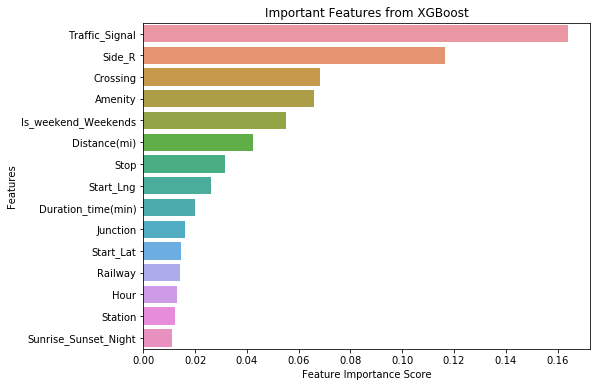

In [80]:
feature_imp = pd.Series(xgb_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=15
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp[:k], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features from XGBoost")
plt.savefig('./output/xgboost_feature_importance.png',bbox_inches='tight', dpi=200)

#### Model Comparison <a id='Part_4_2_5'></a>

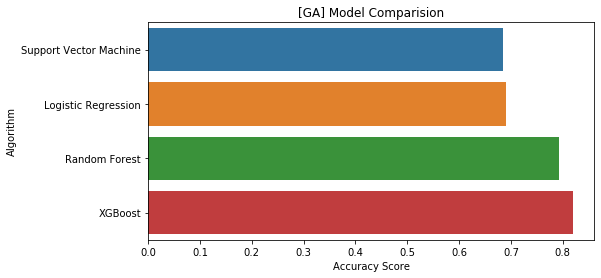

In [83]:
# create a list for the accuracy for each algorithm
accuracy_lst=[lg_acc, svm_acc, rf_acc, xgb_acc]

# Combing list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./output/Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

plt.figure(figsize=(8,4))
sns.barplot(y=df_acc['Algorithm'], x=df_acc['Accuracy_Score'])
plt.ylabel('Algorithm')
plt.xlabel('Accuracy Score')
plt.title("[{}] Model Comparision".format(state))
plt.savefig('./output/model_comparison_{}.png'.format(state),bbox_inches='tight', dpi=200)

## 5. Conclusion and Summary <a id='Part_5'></a>

In this project, I analyzed the accident data from February 2016 to June 2020 in US. There are over 3.4 million accidents are collected in this dataset. Over 95% accidents are labeled as medium severity (level 2 or 3), whereas  only 0.8% events are labeled as loew severity (level 1). So the ability to distinguish between level 2 and 3 severity accidents would be the key factor that affect the accuracy of statistical models.

The locations and time of US traffic accidents show strong heterogeneity. Most accidents happened in the west coast US and eastern US, but fewer accidents in the mid-US are recorded in the data set, except for along the national high ways. And the top 3 states by the number of accidents are California(CA), Texas(TX) and Florida(FL). In terms of the time when accidents happened, I found that the number of accidents in weekdays are over two times more than that at weekends, though the distribution of accidents in weekdays are even. The accidents in weekdays and at weekends can also happen at different time. There are more accidents happening at 7:00-8:00 and 16:00-17:00 in the weekdays, while more accidents are happening in the afternoon at weekends.

The correlation between severity and other variables were also assessed in this work. The variables 'Start_Lng', 'Stop', 'Junction', 'Year', 'Weekday', 'Traffic_Signal' and 'Crossing' are more correlated (positively or negatively) with severity prediction. Altough the 'Wind_Chill' may be a good classifier to distinguish level 1 severity from other levels, as the 'Wind_Chill' for level 1 severity accidents are slightly higher. Due to the high ratio of missing data, this variable had to be dropped for classification.

Machine learning models (Logistic Regression, SVM, Random Forest and XGBoost) were employed to predict the severity of accidents in Georgia (GA), where more accidents happened and state-averaged severity level is higher. Among four models, XGBoost has the highest accuracy (82%), whereas the performance of SVM is the worst. The key improvement of XGBoost is that the mismatches between level 2 and level 3 severity are less and the precision of level 1 severity prediction is higher. Both Random Forest and XGBoost implies that the varibles 'Traffic_Signal', 'Distance', 'Start_Lng', and 'Duration_time' are important features in severity prediction.

In order to have a better evaluation on four models, it is suggested to use cross-validation to estimate the accuracy scores. Due to the limitation of the time, I will leave this for future work. It is also possible to acheive a higher accuracy of a single model through fine-tuning. According to [Abellán, et. al., 2013](#cite-Abellan2013analysis), some variables, like age of drivers, cause of accidents, are also be important in severity analysis. These variables are either not included in the dataset or not used in my project. Gathering those data and including more preprocessing methods may contribute to a better severity classifier.

## Reference

* Abellán, J., López, G., & De OñA, J. (2013). Analysis of traffic accident severity using decision rules via decision trees. Expert Systems with Applications, 40(15), 6047-6054. <a id='cite-Abellan2013analysis'></a>
* Moosavi, S., Samavatian, M. H., Parthasarathy, S., & Ramnath, R. (2019a). A Countrywide Traffic Accident Dataset. arXiv preprint arXiv:1906.05409. <a id='cite-moosavi2019countrywide'></a>

* Moosavi, S., Samavatian, M. H., Parthasarathy, S., Teodorescu, R., & Ramnath, R. (2019b, November). Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights. In Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems (pp. 33-42). <a id='cite-moosavi2019accident'></a>

* World Health Organization. (2018). Global status report on road safety 2018: Summary (No. WHO/NMH/NVI/18.20). World Health Organization. <a id='cite-world2018global'></a> 